In [1]:
import numpy as np

from math import cos,sin,radians,acos,asin,degrees,pi,sqrt
from py_pol.stokes import Stokes
from py_pol.utils import degrees
from py_pol.drawings import draw_poincare,draw_stokes_points,draw_empty_sphere
from scipy.spatial.transform import Rotation as R


%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib.ticker import NullFormatter

import random

import warnings
warnings.filterwarnings("ignore")

Axis equal not supported by your current version of Matplotlib
[-1.00000000e+00  0.00000000e+00  1.83920178e-16]


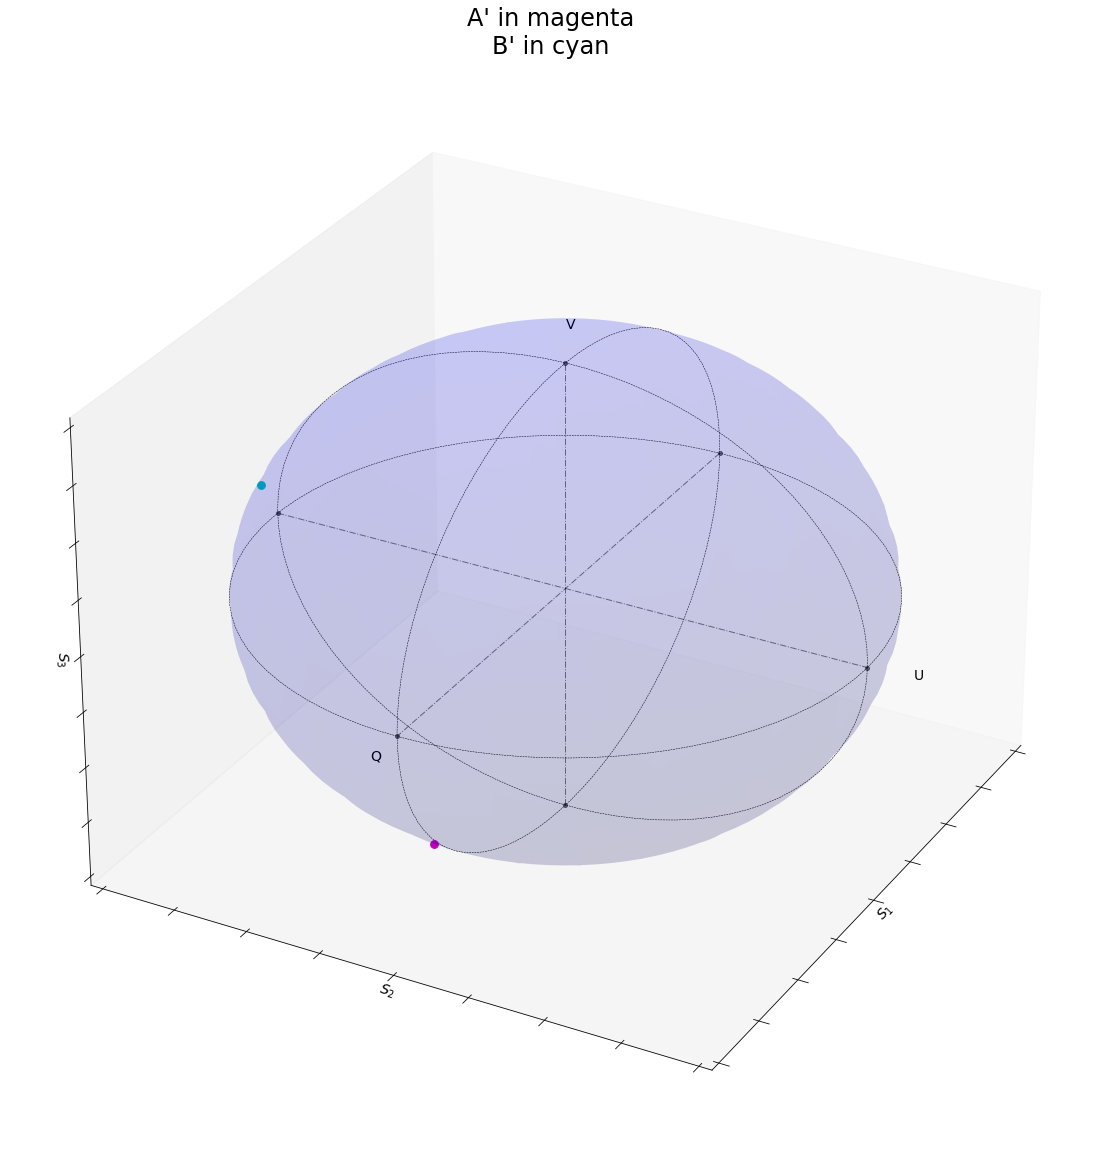

In [2]:

#Create 2 random points 90 degrees apart (A' and B')


#H
stokesA = Stokes("A")
stokesA.from_components((1,1,0,0))

#D
stokesB = Stokes("B")
stokesB.from_components((1,0,1,0))




componentsA=stokesA.parameters.components()[1:]
componentsB=stokesB.parameters.components()[1:]

#Find 2 random angles defining spherical coordinates
two_phi=random.uniform(-pi/2,pi/2)
two_chi=random.uniform(0,2*pi)

#Find stokes components
s1=cos(two_chi)*cos(two_phi)
s2=sin(two_chi)*cos(two_phi)
s3=sin(two_phi)

#Define A' Stokes object
stokesA_prime=Stokes("A'")
stokesA_prime.from_components((sqrt(s1**2+s2**2+s3**2),s1,s2,s3)).normalize()


#Define B' as orthagonal to A'
stokesB_prime=Stokes("B'")
stokesB_prime.from_components((sqrt((s2-s3)**2+(s3-s1)**2+(s1-s2)**2),s2-s3,s3-s1,s1-s2)).normalize()



#Get stokes components A' and B'
componentsA_prime=stokesA_prime.parameters.components()[1:]
componentsB_prime=stokesB_prime.parameters.components()[1:]


rotation_angle=acos(np.dot(componentsA_prime,componentsA))/pi*180

axis=np.cross(componentsA_prime,componentsA)
axis=axis/np.linalg.norm(axis)


rotation1=R.from_rotvec(axis*radians(rotation_angle))

componentsA_primeprime=rotation1.apply(componentsA_prime)
componentsB_primeprime=rotation1.apply(componentsB_prime)

stokesA_primeprime=Stokes("A''")
stokesB_primeprime=Stokes("B''")


stokesA_primeprime.from_components(np.insert(componentsA_primeprime,0,1))
stokesB_primeprime.from_components(np.insert(componentsB_primeprime,0,1))



rotation_angle=acos(np.dot(componentsB_primeprime,componentsB))/pi*180



axis=np.cross(componentsB_primeprime,componentsB)
axis=axis/np.linalg.norm(axis)




if axis[0]>0:
    rotation2=R.from_rotvec(componentsA_primeprime*radians(rotation_angle))
else:
    rotation2=R.from_rotvec(componentsA_primeprime*radians(-1*rotation_angle))


componentsB_final=rotation2.apply(componentsB_primeprime)

# A_final should be the same as A'', so this rotation should have no effect
componentsA_final=rotation2.apply(componentsA_primeprime)


stokesA_final=Stokes("A final")
stokesB_final=Stokes("B final")


stokesA_final.from_components(np.insert(componentsA_final,0,1))
stokesB_final.from_components(np.insert(componentsB_final,0,1))




#Plot A' and B'
fig = plt.figure(figsize=(20,20))
ax=fig.add_subplot(1,1,1,projection='3d',adjustable='box')
draw_empty_sphere(ax,[0.5,0.5])
draw_stokes_points(ax,stokesA_prime,color_scatter='m')
draw_stokes_points(ax,stokesB_prime,color_scatter='c')
plt.title("A' in magenta\nB' in cyan",fontsize=24)






print(axis)

#### 

Axis equal not supported by your current version of Matplotlib


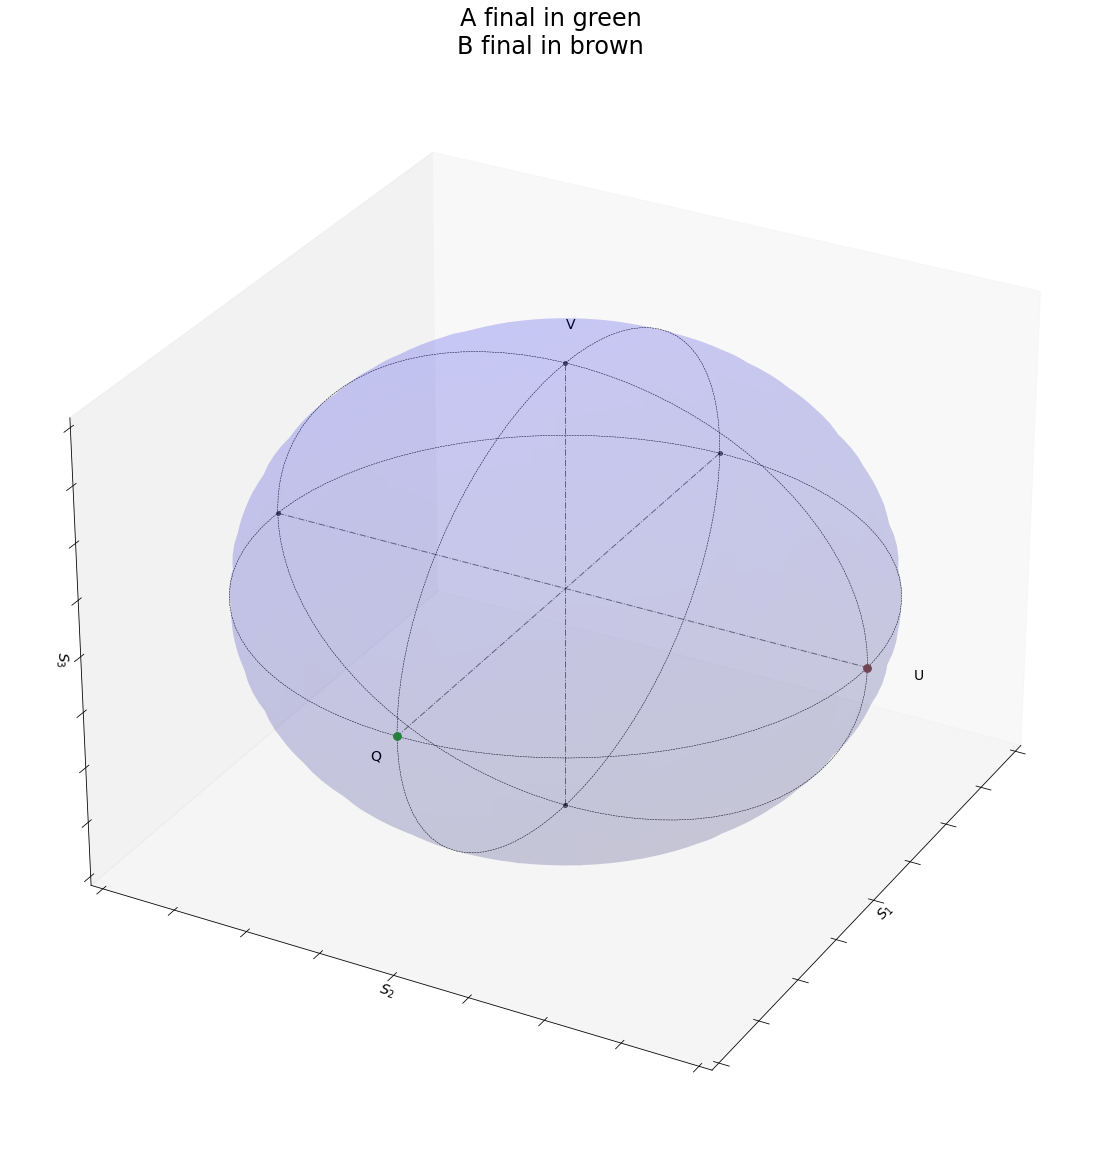

In [3]:
fig = plt.figure(figsize=(20,20))
ax=fig.add_subplot(1,1,1,projection='3d',adjustable='box')
draw_empty_sphere(ax,[0.5,0.5])
_=draw_stokes_points(ax,stokesA_final,color_scatter='tab:green')
_=draw_stokes_points(ax,stokesB_final,color_scatter='tab:brown')
_=plt.title("A final in green\nB final in brown",fontsize=24)